# 1 - Introduction

The purpose of this project is to classify Evira mushies.

The raw data source is the Danish bla. Follow the instructions, and download and extract the data to *mushi-identifier/data/00_raw/*.

In [1]:
# Harkitse, mutta ehkei
# Training & validation labels
# !wget -P /home/jpe/Documents/python_projects/mushi-identifier/data/00_raw/ https://labs.gbif.org/fgvcx/2018/train_val_annotations.tgz

The main questions that this EDA will seek answers for are:
* How many non-corrupt images are there for each Evira mushroom class?
* Are the classes balanced, i.e. do they all have roughly the same amount of data?

Based on the answers, I will decide how much and what sort of external data to gather before starting the modeling.

# 2 - Analysis

To be able to reload functions after changes

In [2]:
%load_ext autoreload
%autoreload 2

Set working directory

In [71]:
import os
os.chdir("/home/jpe/Documents/python_projects/mushi-identifier/")
# THIS MIGHT BE BAD STYLE, RETHINK

Import generic libraries

In [4]:
import pathlib
import pandas as pd
import plotly.express as px

Import custom functions

In [70]:
from src.data.s00_eda_functions import read_json_file, merge_data, create_evira_class_dataframe, search_mushi

Define paths to json files

In [6]:
path_raw_data = pathlib.Path(
    "/home/jpe/Documents/python_projects/mushi-identifier/data/00_raw/")

path_ext_data = pathlib.Path(
    "/home/jpe/Documents/python_projects/mushi-identifier/data/00_external/")

path_json_train = path_raw_data / "train.json"
path_json_validate = path_raw_data / "val.json"
path_json_test = path_raw_data / "test.json"

path_evira_species = path_ext_data / "evira_species.csv"

Import data

In [39]:
df_train_ann, df_train_img, df_train_cat, _, _ = read_json_file(path_json_train)
df_validate_ann, df_validate_img, df_validate_cat, _, _ = read_json_file(path_json_validate)

In [38]:
df_test_ann, df_test_img, df_test_cat, _, _ = read_json_file(path_json_test)

KeyError: 'annotations'

Combine relevant dataframes

In [40]:
df_train = merge_data(df_train_ann, df_train_img, df_train_cat)
df_validate = merge_data(df_validate_ann, df_validate_img, df_train_cat)

In [66]:
df_train.head()

,id,category_id,image_id,file_name,width,license,rights_holder,height,name,supercategory
0,43829,650,21942,images/16390_Leucoagaricus_leucothites/OBL2010...,1300,1,Ole B. Lyshede,732,Leucoagaricus leucothites,Leucoagaricus
1,44039,650,21943,images/16390_Leucoagaricus_leucothites/OBL2010...,1400,1,Ole B. Lyshede,788,Leucoagaricus leucothites,Leucoagaricus
2,44255,650,21944,images/16390_Leucoagaricus_leucothites/OBL2010...,1400,1,Ole B. Lyshede,788,Leucoagaricus leucothites,Leucoagaricus
3,44614,650,22210,images/16390_Leucoagaricus_leucothites/FDE2010...,567,1,Frank Desting,425,Leucoagaricus leucothites,Leucoagaricus
4,45510,650,24812,images/16390_Leucoagaricus_leucothites/FDE2010...,770,1,Frank Desting,577,Leucoagaricus leucothites,Leucoagaricus


Check structure and NAs

In [69]:
# check structure
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85578 entries, 0 to 85577
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             85578 non-null  int64 
 1   category_id    85578 non-null  int64 
 2   image_id       85578 non-null  int64 
 3   file_name      85578 non-null  object
 4   width          85578 non-null  int64 
 5   license        85578 non-null  int64 
 6   rights_holder  85578 non-null  object
 7   height         85578 non-null  int64 
 8   name           85578 non-null  object
 9   supercategory  85578 non-null  object
dtypes: int64(6), object(4)
memory usage: 7.2+ MB


In [42]:
df_validate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4182 entries, 0 to 4181
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             4182 non-null   int64 
 1   category_id    4182 non-null   int64 
 2   image_id       4182 non-null   int64 
 3   file_name      4182 non-null   object
 4   width          4182 non-null   int64 
 5   license        4182 non-null   int64 
 6   rights_holder  4182 non-null   object
 7   height         4182 non-null   int64 
 8   name           4182 non-null   object
 9   supercategory  4182 non-null   object
dtypes: int64(6), object(4)
memory usage: 359.4+ KB


Define our classes

In [11]:
df_evira_classes = pd.read_csv(path_evira_species)

Create df with only Evira classes and counts

In [43]:
df_train_classes, df_train_evira_classes = create_evira_class_dataframe(df_train, df_evira_classes)
df_validate_classes, df_validate_evira_classes = create_evira_class_dataframe(df_validate, df_evira_classes)

Show missing classes

In [63]:
df_train_evira_classes[df_train_evira_classes["count"].isna()]

,scientific_name,finnish_name,count
3,Leccinum aurantiacum,haavanpunikkitatti,NaN
13,Lactarius utilis,kalvashaaparousku,NaN
20,Albatrellus ovinus,lampaankääpä,NaN
23,Hygrophorus camarophyllus,mustavahakas,NaN
24,Morchella spp,huhtasieni,NaN


In [64]:
df_validate_evira_classes[df_validate_evira_classes["count"].isna()]

,scientific_name,finnish_name,count
3,Leccinum aurantiacum,haavanpunikkitatti,NaN
13,Lactarius utilis,kalvashaaparousku,NaN
20,Albatrellus ovinus,lampaankääpä,NaN
23,Hygrophorus camarophyllus,mustavahakas,NaN
24,Morchella spp,huhtasieni,NaN


There seem to be five species without any data. Let's check these manually to make sure there aren't typos or different naming conventions.

In [ ]:
# Hygrophorus camarophyllus, mustavahakas
# search_mushi(df_train_classes, "hygrophorus")
# not in images

In [ ]:
# Albatrellus ovinus, lampaankääpä
# search_mushi(df_train_classes, "albatrellus")
# not in images

In [ ]:
# Morchella spp, huhtasieni
# search_mushi(df_train_classes, "morchella")
# not in images

In [ ]:
# Leccinum aurantiacum, haavanpunikkitatti
# search_mushi(df_train_classes, "leccinum")
# not in images

In [ ]:
# Lactarius utilis, kalvashaaparousku
# search_mushi(df_train_classes, "lactarius u")
# not in images

Plot bar graph for non-missing species

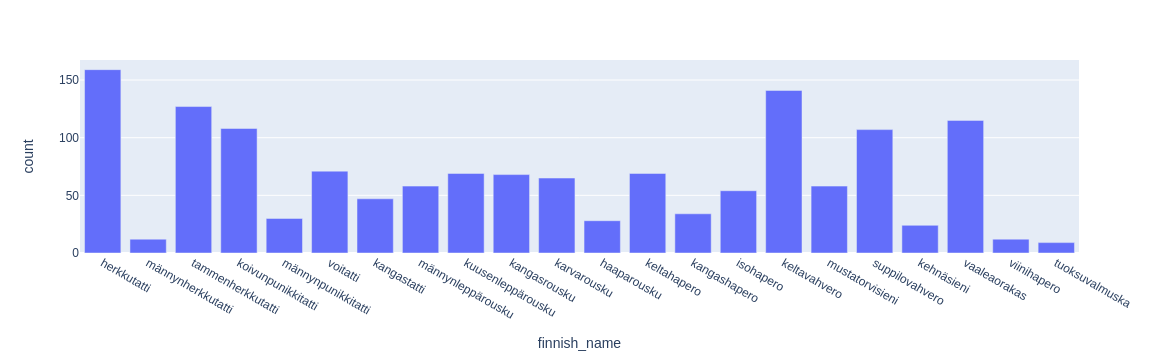

In [56]:
df_plot_train_evira = df_train_evira_classes.dropna()
px.bar(df_plot_train_evira, x="finnish_name", y="count")

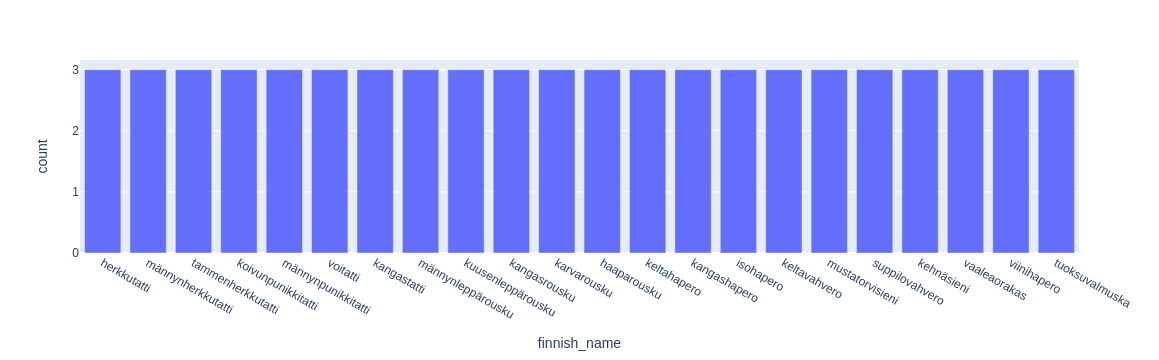

In [55]:
df_plot_validate_evira = df_validate_evira_classes.dropna()
px.bar(df_plot_validate_evira, x="finnish_name", y="count")

## Most of the validation classes just have 3 entries. Wtf?

Unbalanced training set. Lol.

Balanced and extremely small validation set. Lol

# 3 - Conclusions